<a href="https://colab.research.google.com/github/BalajiNaidu05/AIML-CODES/blob/main/AIML_PROGRAMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#BFS ALGORITHM
graph = {
    '5': ['3','7'],
    '3':['2','4'],
    '7':['8'],
    '2':[],
    '4':['8'],
    '8':[]
}
visited = []
queue = []
def bfs(visited,graph,node):
  visited.append(node)
  queue.append(node)
  while queue:
    m = queue.pop(0)
    print(m,end = " ")
    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
print("Following is the Breadth-First Search")
bfs(visited,graph,'5')


Following is the Breadth-First Search
5 3 7 2 4 8 

In [8]:
#DFS ALGORITHM
graph = {
    '5': ['3','7'],
    '3':['2','4'],
    '7':['8'],
    '2':[],
    '4':['8'],
    '8':[]
}
visited = []
queue = []
def dfs (visited,queue,node):
  if node not in visited:
    print(node,end = " ")
    visited.append(node)
    for neighbour in graph[node]:
      dfs(visited,queue,neighbour)
print("Following is the Depth-First Search")
dfs(visited,queue,'5')

Following is the Depth-First Search
5 3 2 4 8 7 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
Mean Squared Error: 0.1894377528550343


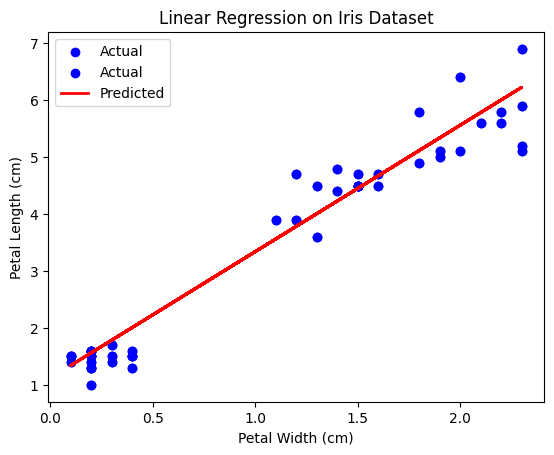

In [9]:
#LINEAR REGRESSION
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Load the iris dataset
iris = datasets.load_iris()
x = iris.data[:, 3].reshape(-1,1) #Petal width
y = iris.data[:, 2] #Petal length

#Convert to a DataFrame for easier handling
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target

print(iris_df.head())

#Split the datasets into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Create and train the linear regression model
model = LinearRegression()
model.fit (X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
plt.scatter(X_test, y_test, color = 'blue', label = 'Actual')


#Plot the results
plt.scatter(X_test, y_test, color = 'blue', label = 'Actual')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2, label = 'Predicted')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Linear Regression on Iris Dataset')
plt.legend()
plt.show()

In [10]:
#ITBFS
from collections import defaultdict

n = int(input("Enter No of Nodes:"))
e = int(input("Enter No of Edge:"))

graph = defaultdict(list)

for i in range(e):
    i,j = map(int,input().split())
    graph[i].append(j)

def dfs(v,goal,limit):
    if v == goal:
        return 1;

    for i in graph[v]:
        if limit-1 >= 0:
            if dfs(i,goal,limit-1) !=  -1:
                return 1
    return -1


goal = int(input("Enter Goal:"))
limit = int(input("Enter Limit:"))

res = dfs(0,goal,limit)

if res == -1:
    print("not found")
else:
    print("found within depth limit")

Enter No of Nodes:4
Enter No of Edge:3
12 13
34 23
30 20
Enter Goal:23
Enter Limit:2
not found


In [11]:
#MAP COLOURING
class MapColoring:
    def __init__(self, states, graph, num_colors):
        self.states = states
        self.graph = graph
        self.num_colors = num_colors
        self.colors = [0] * len(graph)
        self.color_names = ["Red", "Green", "Blue", "Yellow"]

    def is_safe(self, node, color):
        for neighbor in self.graph[node]:
            if self.colors[neighbor] == color:
                return False
        return True

    def color_map(self, node):
        if node == len(self.graph):
            return True

        for color in range(1, self.num_colors + 1):
            if self.is_safe(node, color):
                self.colors[node] = color
                if self.color_map(node + 1):
                    return True
                self.colors[node] = 0
        return False

    def solve(self):
        if not self.color_map(0):
            return "No solution"
        return {self.states[i]: self.color_names[self.colors[i] - 1] for i in range(len(self.states))}

# Example usage:
states = ["Western Australia", "Northern Territory", "Queensland", "South Australia", "New South Wales", "Victoria", "Tasmania"]
graph = [
    [1, 3],          # Edges for Western Australia
    [0, 2, 3],       # Edges for Northern Territory
    [1, 3, 4, 5],    # Edges for Queensland
    [0, 1, 2, 4, 5], # Edges for South Australia
    [2, 3, 5],       # Edges for New South Wales
    [2, 3, 4],       # Edges for Victoria
    []               # Tasmania is an island, no edges
]
num_colors = 4  # Number of colors to use
map_coloring = MapColoring(states, graph, num_colors)
result = map_coloring.solve()
print(f"Color assignment: {result}")


Color assignment: {'Western Australia': 'Red', 'Northern Territory': 'Green', 'Queensland': 'Red', 'South Australia': 'Blue', 'New South Wales': 'Green', 'Victoria': 'Yellow', 'Tasmania': 'Red'}


In [12]:
#RANDOM VARIABLES
import random

def create_environment(size):
    return {
        'size': size,
        'agent_position': [0, 0]
    }

def is_valid_move(environment, position):
    size = environment['size']
    return 0 <= position[0] < size and 0 <= position[1] < size

def perceive(environment):
    return environment['agent_position']

def act(environment):
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    random_move = random.choice(moves)
    new_position = [
        environment['agent_position'][0] + random_move[0],
        environment['agent_position'][1] + random_move[1]
    ]

    if is_valid_move(environment, new_position):
        environment['agent_position'] = new_position
        return f"Moved to {environment['agent_position']}"
    else:
        return "Cannot move, stayed in place"

def main():
    env_size = 5
    num_steps = 10

    environment = create_environment(env_size)

    print(f"Starting position: {perceive(environment)}")

    for step in range(num_steps):
        print(f"Step {step + 1}: {act(environment)}")

if __name__ == "__main__":
    main()

Starting position: [0, 0]
Step 1: Moved to [1, 0]
Step 2: Moved to [1, 1]
Step 3: Moved to [1, 2]
Step 4: Moved to [0, 2]
Step 5: Moved to [1, 2]
Step 6: Moved to [2, 2]
Step 7: Moved to [2, 3]
Step 8: Moved to [3, 3]
Step 9: Moved to [3, 4]
Step 10: Moved to [3, 3]
